In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/post natal data.csv')

In [ ]:
data.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [ ]:
data.shape

(1503, 11)

In [ ]:
print(data.columns)

Index(['Timestamp', 'Age', 'Feeling sad or Tearful',
       'Irritable towards baby & partner', 'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')


In [ ]:
data.isnull().sum()

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(1491, 11)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data["Trouble sleeping at night"].value_counts()

Two or more days a week    640
Yes                        445
No                         418
Name: Trouble sleeping at night, dtype: int64

In [ ]:
data["Problems concentrating or making decision"].value_counts()

No       583
Often    473
Yes      435
Name: Problems concentrating or making decision, dtype: int64

In [ ]:
data["Suicide attempt"].value_counts()

No                       709
Yes                      459
Not interested to say    335
Name: Suicide attempt, dtype: int64

<Axes: >

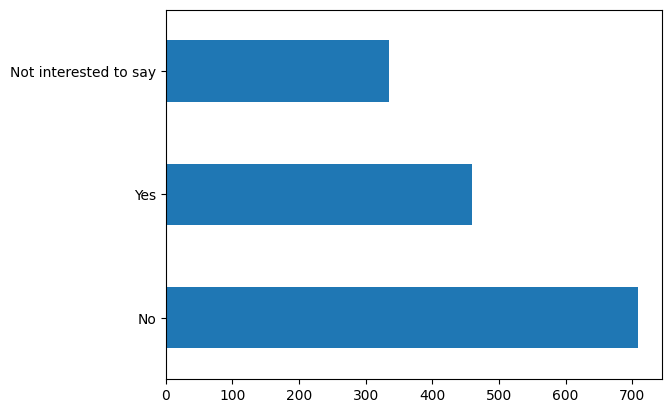

In [ ]:
data["Suicide attempt"].value_counts().plot(kind='barh')

<Axes: >

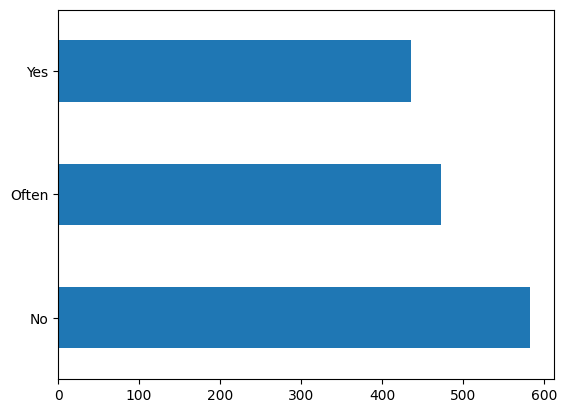

In [ ]:
data["Problems concentrating or making decision"].value_counts().plot(kind='barh')

In [ ]:
data = data.drop(columns="Timestamp")

In [ ]:
data.shape

(1503, 10)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [ ]:
categorical_feature = data[['Age']]
encoded_feature = encoder.fit_transform(categorical_feature)
data['Age'] = encoded_feature
data.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,2.0,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,3.0,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,2.0,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,2.0,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,3.0,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [ ]:
data.Age.value_counts()

3.0    364
2.0    349
1.0    338
4.0    271
0.0    181
Name: Age, dtype: int64

In [ ]:
encoder = OrdinalEncoder()
categorical_feature = data[['Feeling sad or Tearful']]
encoded_feature = encoder.fit_transform(categorical_feature)
data['Feeling sad or Tearful'] = encoded_feature

In [ ]:
data.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,2.0,2.0,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,3.0,2.0,No,No,Yes,Yes,No,Yes,Yes,No
2,2.0,2.0,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,2.0,2.0,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,3.0,2.0,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [ ]:
encoder = OrdinalEncoder()
categorical_feature = data[['Irritable towards baby & partner']]
encoded_feature = encoder.fit_transform(categorical_feature)
data['Irritable towards baby & partner'] = encoded_feature

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Irritable towards baby & partner'] = le.fit_transform(data['Irritable towards baby & partner'])
data['Trouble sleeping at night'] = le.fit_transform(data['Trouble sleeping at night'])
data['Problems concentrating or making decision'] = le.fit_transform(data['Problems concentrating or making decision'])
data['Overeating or loss of appetite'] = le.fit_transform(data['Overeating or loss of appetite'])
data['Feeling anxious'] = le.fit_transform(data['Feeling anxious'])
data['Problems of bonding with baby'] = le.fit_transform(data['Problems of bonding with baby'])
data['Suicide attempt'] = le.fit_transform(data['Suicide attempt'])
data['Feeling of guilt'] = le.fit_transform(data['Feeling of guilt'])

In [ ]:
X= data[["Irritable towards baby & partner",'Age','Trouble sleeping at night','Overeating or loss of appetite','Feeling sad or Tearful','Feeling of guilt','Problems of bonding with baby',"Problems concentrating or making decision"]]
y =data["Suicide attempt"]

In [ ]:
X

,Irritable towards baby & partner,Age,Trouble sleeping at night,Overeating or loss of appetite,Feeling sad or Tearful,Feeling of guilt,Problems of bonding with baby,Problems concentrating or making decision
0,2,2.0,1,2,2.0,1,2,2
1,0,3.0,0,2,2.0,2,2,2
2,0,2.0,2,2,2.0,1,1,2
3,2,2.0,2,0,2.0,0,0,2
4,0,3.0,1,0,2.0,1,2,2
...,...,...,...,...,...,...,...,...
1498,0,1.0,1,0,2.0,0,1,0
1499,0,0.0,0,0,1.0,0,2,1
1500,1,0.0,1,0,0.0,2,0,0
1501,1,0.0,2,0,0.0,1,0,1


In [ ]:
y

0       2
1       0
2       0
3       0
4       0
       ..
1498    0
1499    0
1500    1
1501    0
1502    0
Name: Suicide attempt, Length: 1503, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [ ]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)


In [ ]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [ ]:
svm = SVC(random_state=0)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [ ]:
models = {
    "Random Forest": accuracy_rf,
    "Logistic Regression": accuracy_lr,
    "Decision Tree": accuracy_dt,
    "K-Nearest Neighbors": accuracy_knn,
    "Support Vector Machine": accuracy_svm
}

# Sort the models by accuracy
sorted_models = {k: v for k, v in sorted(models.items(), key=lambda item: item[1], reverse=True)}

# Print the accuracy of each model
for k, v in sorted_models.items():
    print(f"{k}: {v:.2f}")

Decision Tree: 0.97
Random Forest: 0.96
K-Nearest Neighbors: 0.79
Support Vector Machine: 0.78
Logistic Regression: 0.53


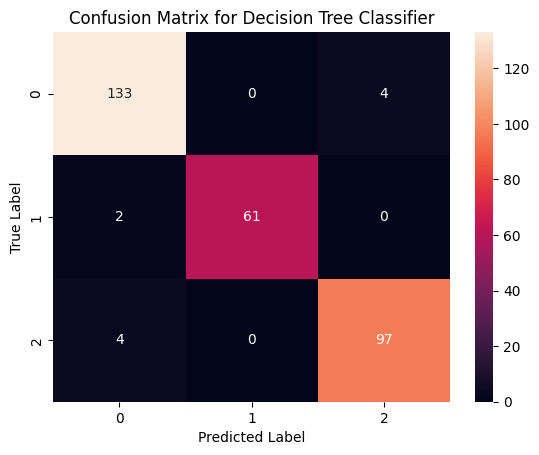

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree Classifier")

# Show the plot
plt.show()